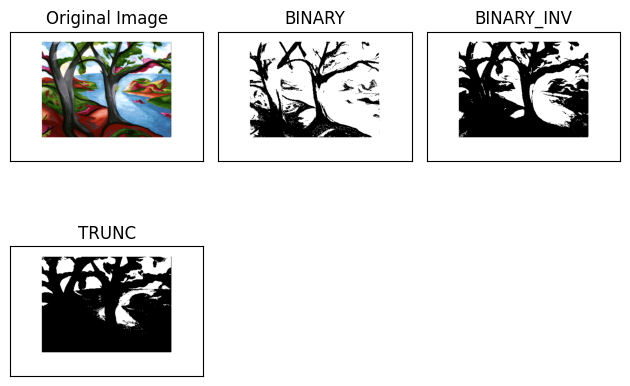

In [7]:
# Task 1
import imutils as im
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

imgBGR = cv.imread('../img/trees.png')
imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)

thresholds = [(255*0.25), (255*0.5), (255*0.75)]  # Corresponding to 25%, 50%, 75% of 255
binary_images = []

for threshold in thresholds:
    _, binary_image = cv.threshold(cv.cvtColor(imgRGB, cv.COLOR_RGB2GRAY), threshold, 255, cv.THRESH_BINARY)
    binary_images.append(binary_image)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [imgRGB] + binary_images
 
for i in range(4):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)    
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.tight_layout()
plt.show()

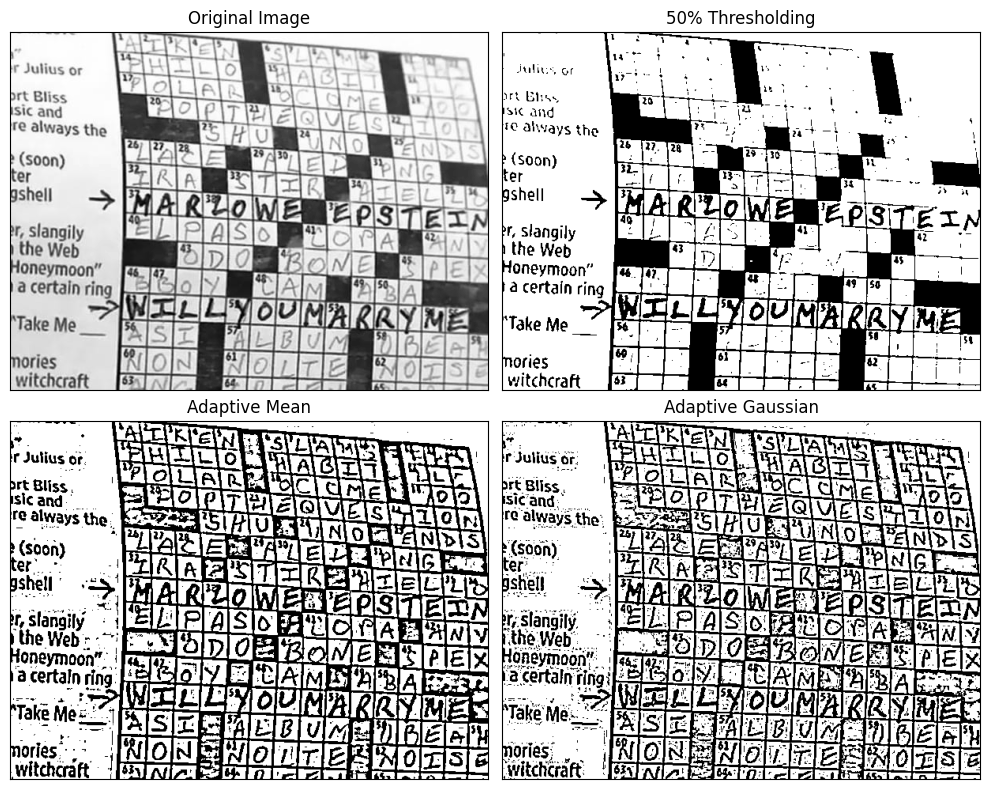

In [ ]:
# Task 2
# Adaptive thresholding is a technique used to convert grayscale images into binary images 
# by determining the threshold value dynamically for smaller regions of the image rather than applying a single global threshold.

import cv2 as cv
from matplotlib import pyplot as plt

imgBGR = cv.imread("../img/creative-proposal.jpg")
assert imgBGR is not None, "File could not be read, check the file path."

img_gray = cv.cvtColor(imgBGR, cv.COLOR_BGR2GRAY)

# 1. Apply 50% Thresholding (Global)
_, binary_50 = cv.threshold(img_gray, (255*0.5), 255, cv.THRESH_BINARY)  # 50% of 255 is 128

# 3. Apply Adaptive Thresholding
adaptive_mean = cv.adaptiveThreshold(
    img_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=11, C=2
)
adaptive_gaussian = cv.adaptiveThreshold(
    img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize=11, C=2
)

# 4. Display the images in a 2x2 subplot
titles = ['Original Image', '50% Thresholding', 'Adaptive Mean', 'Adaptive Gaussian']
images = [img_gray, binary_50, adaptive_mean, adaptive_gaussian]

plt.figure(figsize=(10, 8))
for i, (title, image) in enumerate(zip(titles, images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)

plt.tight_layout()
plt.show()


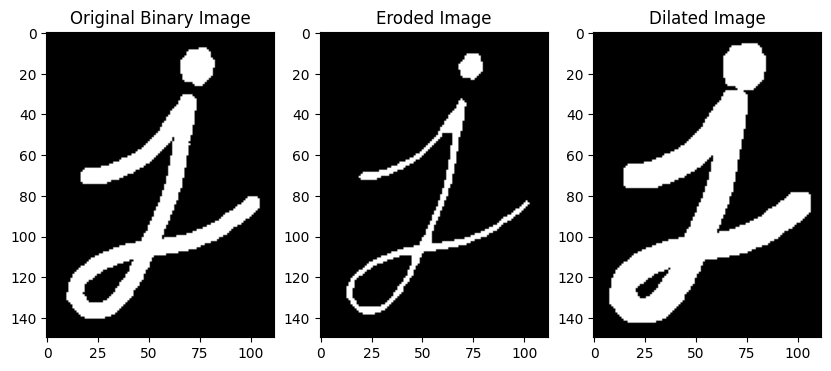

In [2]:
# Task 3

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('../img/j.png', cv2.IMREAD_GRAYSCALE)

_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) # 50% Threshold, half of 255 is 127

kernel = np.ones((5, 5), np.uint8)
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Binary Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap='gray')

plt.show()

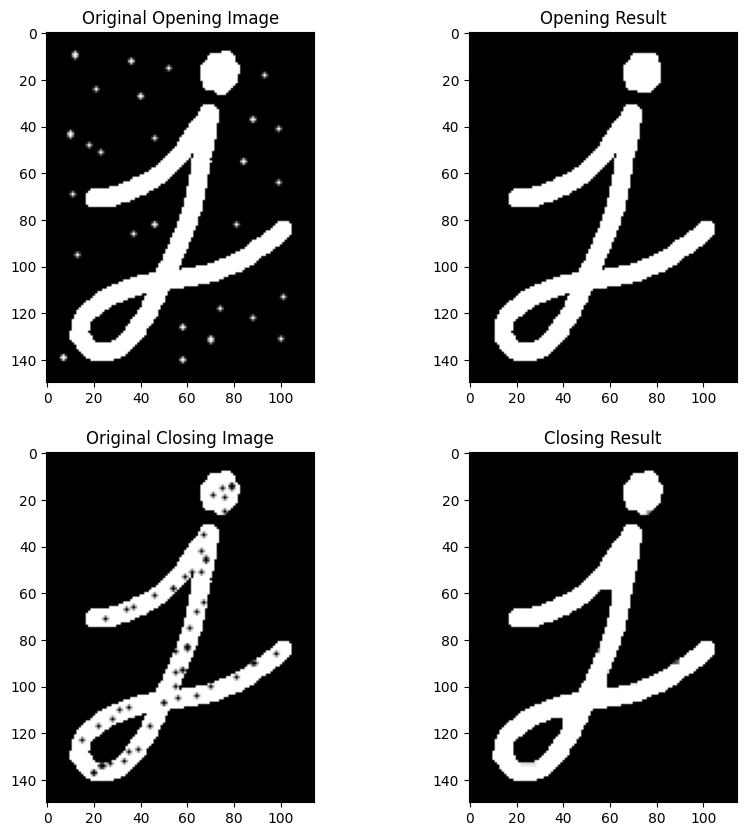

In [3]:
# Task 4

opening_image = cv2.imread('../img/opening_original.png', cv2.IMREAD_GRAYSCALE)
opening_result = cv2.morphologyEx(opening_image, cv2.MORPH_OPEN, kernel)
closing_image = cv2.imread('../img/closing_original.png', cv2.IMREAD_GRAYSCALE)
closing_result = cv2.morphologyEx(closing_image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Original Opening Image")
plt.imshow(opening_image, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Opening Result")
plt.imshow(opening_result, cmap='gray')

plt.subplot(2, 2, 3)
plt.title("Original Closing Image")
plt.imshow(closing_image, cmap='gray')

plt.subplot(2, 2, 4)
plt.title("Closing Result")
plt.imshow(closing_result, cmap='gray')

plt.show()